In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [ ]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [ ]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Проверим, сколько в таблице пустых значений

In [ ]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Посмотрим как распределена недвижимость по населенным пунктам

In [ ]:
df.locality_name.value_counts()   

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

Посмотрим число дубликатов

In [ ]:
df.duplicated().sum()

0

### Выводы

1. В базе данных имеется много пропусков, размерность датасета - 23699 строк
2. Нет дублирующихся строк
3. В некоторых колонках указан некорректный тип данных (например, is_apartment, balcony, parks_around3000, first_day_exposition)


# Шаг 2. Предобработка данных

**Определим и изучим пропущенные значения**

In [ ]:
pd.DataFrame(df.isna().mean()*100).sort_values(by=0, ascending = False)

,0
is_apartment,88.290645
parks_nearest,65.909954
ponds_nearest,61.559559
balcony,48.605426
ceiling_height,38.799105
airports_nearest,23.384953
cityCenters_nearest,23.287902
ponds_around3000,23.283683
parks_around3000,23.283683
days_exposition,13.422507


Удалим строки с минимальным значением пропусков

In [ ]:
df = df.dropna(subset=['locality_name','floors_total'])

Наибольший процент пропусков в is_apartment. Скорее всего, оно связано с тем, что значения Ложь не проставлялись в этот столбец

In [ ]:
df.is_apartment 

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
23694    NaN
23695    NaN
23696    NaN
23697    NaN
23698    NaN
Name: is_apartment, Length: 23565, dtype: object

In [ ]:
#заполним на данном этапе столбец подобным образом
df['is_apartment']=df['is_apartment'].fillna(False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Проверим, связаны ли пропуски в parks_nearest и parks_around3000, а также в ponds_nearest, ponds_around3000

In [ ]:
print(df.loc[df['parks_around3000'].isna()]['parks_nearest'].unique())
print(df.loc[df['ponds_around3000'].isna()]['ponds_nearest'].unique())

[nan]
[nan]


Так как в обоих колонках в обоих случаях мы получаем значение nan, приходим к выводу, что пропуски связаны. Заменим их на 0

In [ ]:
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(df.loc[df['parks_around3000']==0]['parks_nearest'].unique())
print(df.loc[df['ponds_around3000']==0]['ponds_nearest'].unique())

[  nan 3064. 3190. 3013.]
[nan]


Значит в оставшихся значениях расстояние больше 3000. Заменим пустые строки условными 3500 метрами.

In [ ]:
df['parks_nearest'] = df['parks_nearest'].fillna(value=3500)
df['ponds_nearest'] = df['ponds_nearest'].fillna(value=3500)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(df.loc[df['parks_around3000']==0]['parks_nearest'].unique())
print(df.loc[df['ponds_around3000']==0]['ponds_nearest'].unique())

[3500. 3064. 3190. 3013.]
[3500.]


В случае с балконами отсуствие значения скорее всего означает отсутствие балкона, заменим пропуски нулями

In [ ]:
df['balcony']=df['balcony'].fillna(value=0)

Высоту потолков заменим на самое распространенное значение, то есть на моду

In [ ]:
df['ceiling_height']=df['ceiling_height'].fillna(value=df['ceiling_height'].mode()[0])

Заполним расстояние до ближайшего аэропорта и центра города медианой в соответствии с населенными пунктами

In [ ]:
airports=df.groupby('locality_name')['airports_nearest'].median()
for locality_name in airports.index:
    df.loc[(df['airports_nearest'].isna()) & (df['locality_name'] == locality_name), 'airports_nearest'] = airports.loc[locality_name]
centres=df.groupby('locality_name')['cityCenters_nearest'].median()
for locality_name in centres.index:
    df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == locality_name), 'cityCenters_nearest'] = centres.loc[locality_name]

Пропуски по жилой площади и площади кухни заполним в соответсвии с населенным пунктом

In [ ]:
df.loc[df['studio'] == 1, 'kitchen_area'] = 0
kitchen=df.groupby('locality_name')['kitchen_area'].median()
for locality_name in kitchen.index:
    df.loc[(df['kitchen_area'].isna()) & (df['locality_name'] == locality_name), 'kitchen_area'] = kitchen.loc[locality_name]

In [ ]:
df=df.dropna(subset=['kitchen_area'])

А жилую площадь в соотвествии с числом комнат

In [ ]:
living = df.groupby('rooms')['living_area'].median()
for rooms_number in living.index:
    df.loc[(df['rooms'] == rooms_number), 'living_area'] = df.loc[(df['rooms'] == rooms_number),'living_area'].fillna(living[rooms_number])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
pd.DataFrame(df.isna().mean()*100).sort_values(by=0, ascending = False)

,0
cityCenters_nearest,22.996560
airports_nearest,22.996560
days_exposition,13.462437
last_price,0.000000
ponds_nearest,0.000000
ponds_around3000,0.000000
parks_nearest,0.000000
parks_around3000,0.000000
locality_name,0.000000
balcony,0.000000


Оставшиеся пропуски заполнить, не имея дополнительной информации, не выйдет

In [ ]:
#Переведем столбец first_day_exposition в тип данных datetime 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Приведем к нижнему регистру столбец с названием поселков
df.locality_name = df.locality_name.str.lower()

In [ ]:
#Переведем сначала в numeric наши столбцы чтобы можно было их перевести в int 
for column in ['last_price','total_area','ceiling_height',
              'floors_total','living_area','kitchen_area','balcony',
              'airports_nearest','cityCenters_nearest', 'parks_around3000',
              'parks_nearest','ponds_around3000','ponds_nearest',
              'days_exposition']:
    df[column] = pd.to_numeric(df[column])
    df[column] = df[column].astype(int, errors='ignore')

In [ ]:
#Удалим дубликаты
key = ['total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name', 'first_day_exposition']
df = df.drop_duplicates(subset=key)

### **Выводы**

1. Были заполнены все возможные пропуски, однако некоторые пропуски заполнить невозможно cityCenters_nearest, airports_nearest, days_exposition
2. Были удалены все дубликаты
3. Изменены типы данных 

# Шаг 3. Посчитайте и добавьте в таблицу

In [ ]:
#цена квадратного метра
df['square_price']=df['last_price']/df['total_area']

In [ ]:
#День недели, месяц и год публикации объявления
df['weekday_exposition']=df['first_day_exposition'].dt.weekday.astype('str').map({'0': 'Пн', '1': 'Вт', '2': 'Ср', '3': 'Чт', '4': 'Пт', '5': 'Сб', '6': 'Вс'})
df['month_exposition']=df['first_day_exposition'].dt.month.astype('str').map({'1': 'ЯНВ', '2': 'ФЕВ', '3': 'МАР', '4': 'АПР', '5': 'МАЙ', '6': 'ИЮН', '7': 'ИЮЛ', '8': 'АВГ', '9': 'СЕНТ', '10': 'ОКТ', '11': 'НОЯ', '12': 'ДЕК'})
df['year_exposition']=df['first_day_exposition'].dt.year

In [ ]:
#этаж квартиры
def floor_groups(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
df['floor_groups'] = df.apply(floor_groups, axis=1)

In [ ]:
#соотношение жилой и общей площади, а также отношение площади кухни к общей
df['living_area_to_total_area']=df['living_area']/df['total_area']
df['kitchen_area_to_total_area']=df['kitchen_area']/df['total_area']

**Вывод**:
Были посчитаны все значения и результаты занесены в новые столбцы

# Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### •	Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

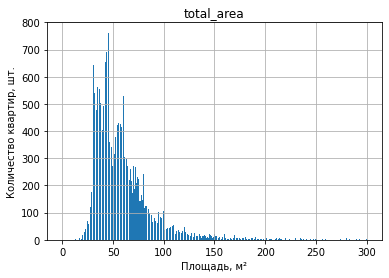

In [ ]:
df.hist('total_area', bins = 400, range = [0, 300])
plt.xlabel('Площадь, м²')
plt.ylabel('Количество квартир, шт.')
plt.show()

#можно заметить, что наиболее распространенная площадь находится в пределах от 30 до 60 кв метров. Чем больше площадь, тем реже встречаются подобные квартиры

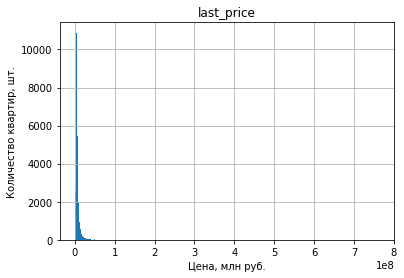

In [ ]:
df.hist('last_price', bins = 300)
plt.xlabel('Цена, млн руб.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Большая часть квартир не превышает цену в 1 млн рублей

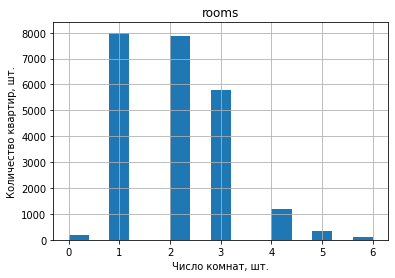

In [ ]:
df.hist('rooms', bins = 15, range = [0,6])
plt.xlabel('Число комнат, шт.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Наиболее распространены 1- и 2-х комнатные квартиры. Данные по 0 комнат - это студии, их число невилико, так же как и больших, 5- 6-ти комнатных квартир

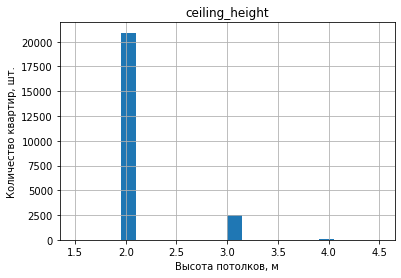

In [ ]:
df.hist('ceiling_height', bins=20, range = [1.5,4.5])
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир, шт.')
plt.show()

Чаще всего встречаются квартиры с высотой потолков в 2 метра

### •	Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

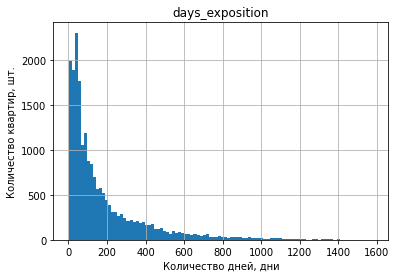

In [ ]:
df.hist('days_exposition', bins=100)
plt.xlabel('Количество дней, дни')
plt.ylabel('Количество квартир, шт.')
plt.show()

In [ ]:
#посчитаем среднее и медиану
print(df['days_exposition'].mean())
print(df['days_exposition'].median())

180.76433339878264
95.0


По гистограмме видно, что чаще всего квартиры продавались в течение 100 дней, это подтверждается и значением медианы. На среднее сильно влияют немногочисленные продажи в течение 600 и более дней. Продажи прошли необычно быстро, если заняли менее 40 дней, но подобные продажи все равно происходят довольно часто. Необычайно долгой можно считать продажу, которая затянулась на полтора года и больше

### •	Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

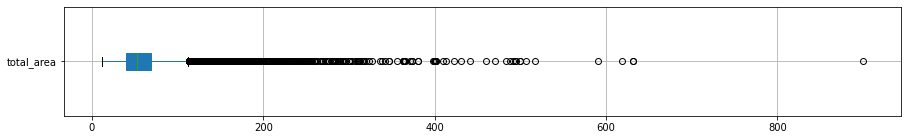

In [ ]:
ax=df.boxplot('total_area', vert=False, figsize=(15,2), patch_artist=True)
plt.show()

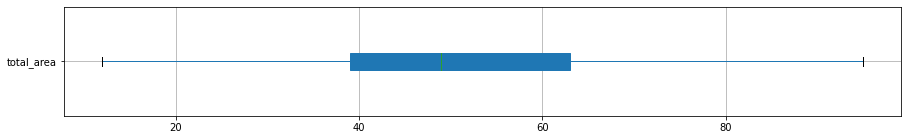

In [ ]:
#удалим выбросы
df.drop(df[df['total_area'] > 95].index, inplace=True)
ax=df.boxplot('total_area', vert=False, figsize=(15,2), patch_artist=True)
plt.show()

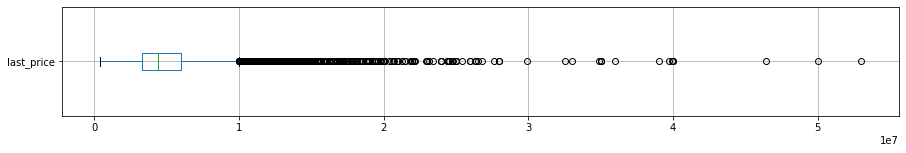

In [ ]:
ax=df.boxplot('last_price', vert=False, figsize=(15,2))
plt.show()

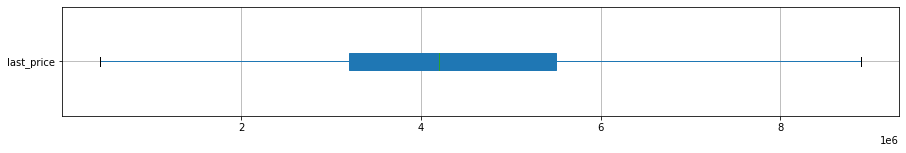

In [ ]:
#удалим выбросы
df.drop(df[df['last_price'] > 8900000].index, inplace=True)
ax=df.boxplot('last_price', vert=False, figsize=(15,2), patch_artist=True)
plt.show()

Нет необходимости считать выбросы для комнат и высоты потолков, так как там очень мало уникальных значений

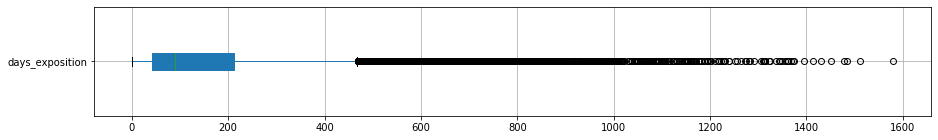

In [ ]:
ax=df.boxplot('days_exposition', vert=False, figsize=(15,2), patch_artist=True)
plt.show()

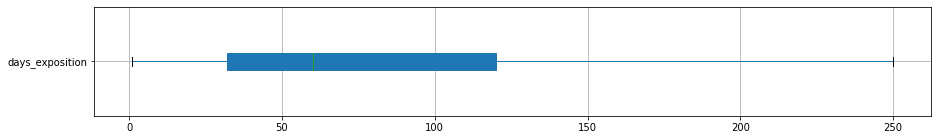

In [ ]:
df.drop(df[df['days_exposition'] > 250 ].index, inplace=True)
ax=df.boxplot('days_exposition', vert=False, figsize=(15,2), patch_artist=True)
plt.show()

### •	Графики с исправленными значениями

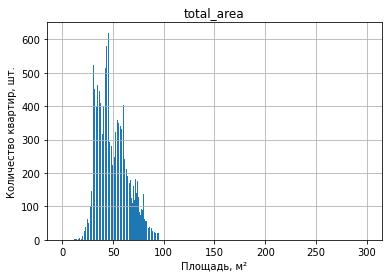

In [ ]:
df.hist('total_area', bins = 400, range = [0, 300])
plt.xlabel('Площадь, м²')
plt.ylabel('Количество квартир, шт.')
plt.show()

#можно заметить, что наиболее распространенная площадь находится в пределах от 30 до 60 кв метров. Чем больше площадь, тем реже встречаются подобные квартиры

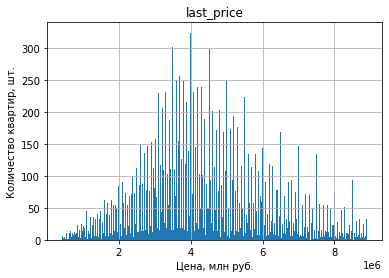

In [ ]:
df.hist('last_price', bins = 300)
plt.xlabel('Цена, млн руб.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Большая часть квартир не превышает цену в 1 млн рублей

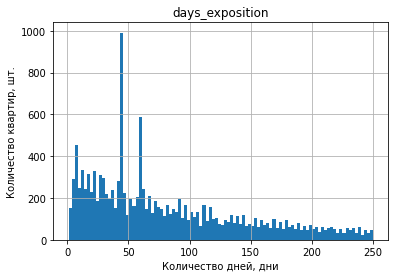

In [ ]:
df.hist('days_exposition', bins=100)
plt.xlabel('Количество дней, дни')
plt.ylabel('Количество квартир, шт.')
plt.show()

### •	Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

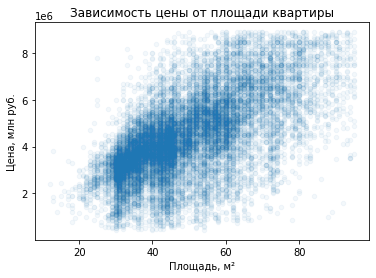

In [ ]:
df.plot(x='total_area', y='last_price', kind = 'scatter', alpha=0.05)
plt.title('Зависимость цены от площади квартиры')
plt.xlabel('Площадь, м²')
plt.ylabel('Цена, млн руб.')
plt.show()

Можно заметить линейную зависить

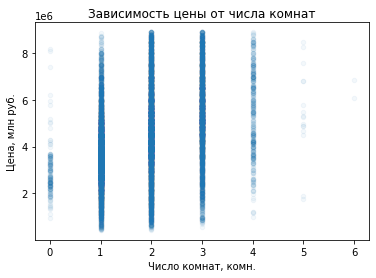

In [ ]:
df.plot(x='rooms', y='last_price', kind='scatter', alpha=0.05)
plt.title('Зависимость цены от числа комнат')
plt.xlabel('Число комнат, комн.')
plt.ylabel('Цена, млн руб.')
plt.show()

Зависимость не наблюдается

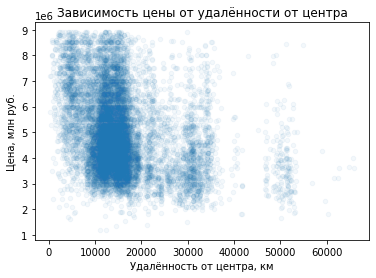

In [ ]:
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.05)
plt.title('Зависимость цены от удалённости от центра')
plt.xlabel('Удалённость от центра, км')
plt.ylabel('Цена, млн руб.')
plt.show()

Можно заметить, что чем ближе квартира к центру, тем выше ее цена

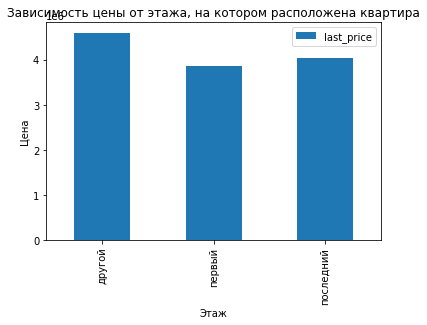

In [ ]:
floors=df.pivot_table(index='floor_groups', values='last_price', aggfunc='mean')
floors.plot(kind='bar')
plt.title('Зависимость цены от этажа, на котором расположена квартира')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

Цены квартир на не первых и не последних наиболее большие, на первом этаже квартиры самые дешвые. Но это так же может быть связано с тем, что на других этажах в принципе больше квартир, соответственно выше вероятность, что они будут многокомнатными и дорогими

Text(0.5, 1.0, 'Зависимость цены от дня недели размещения')

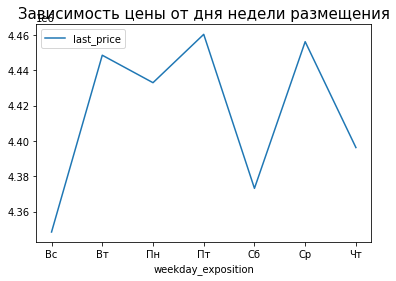

In [ ]:
selling_day=pd.pivot_table(df, index='weekday_exposition', values='last_price',)
selling_day.plot(y='last_price')
plt.title('Зависимость цены от дня недели размещения', fontsize=15)

Квартиры, выставляющиеся на продажу субботу и воскресенье наиболее дешевые, но разница в цене минимальная

Text(0.5, 1.0, 'Зависимость цены от месяца размещения')

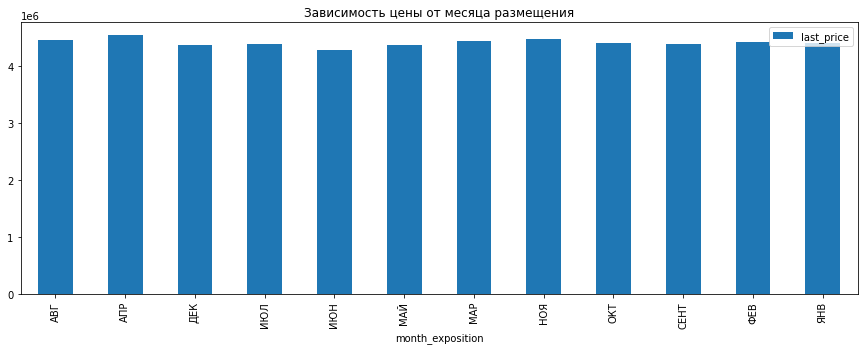

In [ ]:
selling_day=pd.pivot_table(df, index='month_exposition', values='last_price')
selling_day.plot(y='last_price', style='o-', figsize = (15, 5), kind = 'bar')
plt.title('Зависимость цены от месяца размещения')

Квартиры, размещенные в апреле, наиболее дорогие, а те, что были размещены в июне - наиболее дешевые. Но разница все еще не разительная, соответственно не может быть обоснована только месяцем

Text(0.5, 1.0, 'Зависимость цены от года размещения')

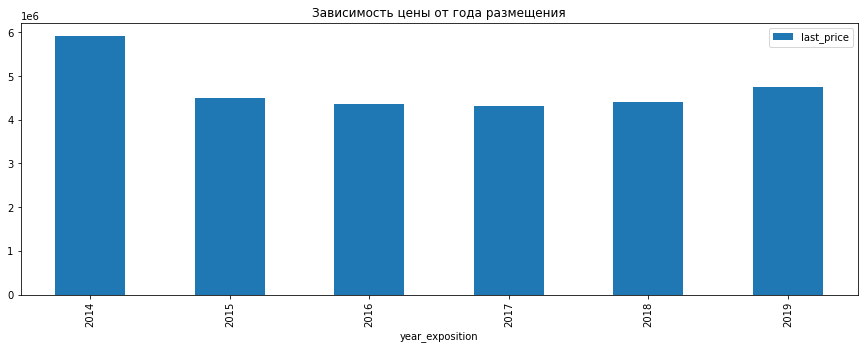

In [ ]:
selling_day=pd.pivot_table(df, index='year_exposition', values='last_price')
selling_day.plot(y='last_price', style='o-', figsize = (15, 5), kind = 'bar')
plt.title('Зависимость цены от года размещения')

В 2014 году квартиры были дороже, чем в последующие годы, при этом в 2017 цены были наименьшими. Также интересно, что в 2019 году цены снова начали подниматься. Ситуация с 2014 годом так же может быть объяснена недостатком данных

                last_price  ceiling_height     rooms  total_area     floor
last_price        1.000000        0.056747  0.385630    0.612770  0.165678
ceiling_height    0.056747        1.000000  0.022217    0.048829 -0.027588
rooms             0.385630        0.022217  1.000000    0.808106 -0.191715
total_area        0.612770        0.048829  0.808106    1.000000 -0.044971
floor             0.165678       -0.027588 -0.191715   -0.044971  1.000000


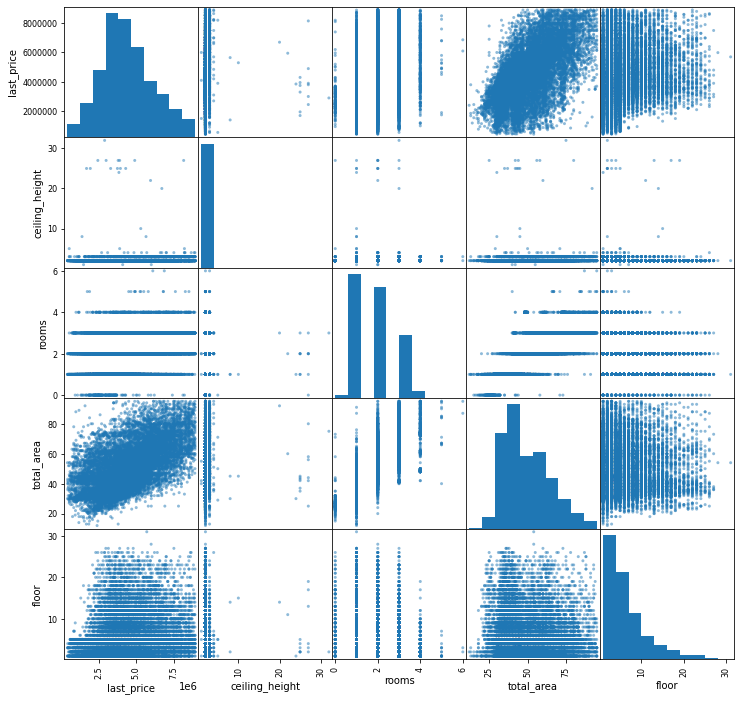

In [ ]:
#Построим матрицу корреляций для столбцов влияющих на цену квартиры в общем
corr_table = df[['last_price','ceiling_height','rooms','total_area','floor']]
pd.plotting.scatter_matrix(corr_table, figsize=(12,12))
print(corr_table.corr())

### •	Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('посёлок ', '')
df['locality_name'] = df['locality_name'].str.replace('деревня ', '')
top_locs=(df.groupby('locality_name')['square_price'].agg(['mean', 'count'])).sort_values(by='count', ascending=False).head(10)
print(top_locs)

                          mean  count
locality_name                        
санкт-петербург  104830.994568   9981
мурино            87384.896569    468
кудрово           96100.104779    374
шушары            79375.166427    356
всеволожск        67335.701021    294
колпино           75748.266833    281
парголово         90623.106030    262
пушкин            99734.596048    245
гатчина           69386.066464    232
выборг            58944.144638    179


Самые высокие цены в Санкт-петербурге, при этом там же находится наибольшее число квартир. Самые дешевые квартиры в Выборге

In [ ]:
#средняя цена квадратного метра
print(top_locs['mean'].mean())

82946.30433778153


In [ ]:
#населенные пункты с самой высокой и низкой стоимостью жилья
print(top_locs.sort_values(by='mean', ascending=False).head(3))
print(top_locs.sort_values(by='mean', ascending=False).tail(3))

                          mean  count
locality_name                        
санкт-петербург  104830.994568   9981
пушкин            99734.596048    245
кудрово           96100.104779    374
                       mean  count
locality_name                     
гатчина        69386.066464    232
всеволожск     67335.701021    294
выборг         58944.144638    179


### •	Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [ ]:
spb=df.query('locality_name == "санкт-петербург"')
spb=spb.dropna()
spb['centre_distance']=(spb['cityCenters_nearest']/1000).round(0)
price_per_km=spb.groupby(['centre_distance']).agg({'last_price' : 'mean'})

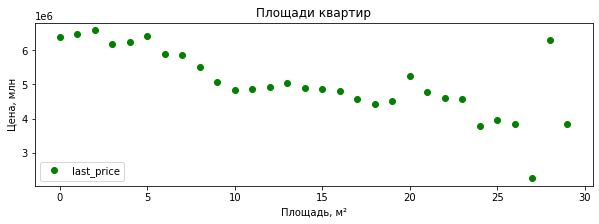

In [ ]:
price_per_km.plot(figsize = (10,3), style ='go')
x = price_per_km.index 
y = price_per_km['last_price']
plt.title('Площади квартир')
plt.xlabel('Площадь, м²')
plt.ylabel('Цена, млн')
plt.show()

Из графика видно, что чем ближе к центру находится квартира, тем выше ее цена. Цены начинают резко снижаться в районе 6-7 км, соответственно таков радиус центральной зоны

### •	Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [ ]:
spb = spb.query('centre_distance <= 6')

In [ ]:
spb=spb.rename(columns={"last_price": "Цена", "total_area": "Общая площадь", "rooms": "Кол-во комнат", "ceiling_height": "Высота потолков", "kitchen_area": "Площадь кухни", "living_area": "Жилая площадь",'balcony':'Балкон','parks_around3000': 'Число парков в радиусе 3 км', 'ponds_around3000':'Число водоёмов в радиусе 3 км'})
columns1 = ["Цена", "Общая площадь", "Кол-во комнат", "Высота потолков"]
columns2 = ["Цена", "Площадь кухни", "Жилая площадь", 'Балкон','Число парков в радиусе 3 км', 'Число водоёмов в радиусе 3 км']

diction = [columns1, columns2]

,Цена,Общая площадь,Кол-во комнат,Высота потолков
Цена,1.000000,0.653640,0.405409,0.117446
Общая площадь,0.653640,1.000000,0.773353,0.151173
Кол-во комнат,0.405409,0.773353,1.000000,0.095307
Высота потолков,0.117446,0.151173,0.095307,1.000000


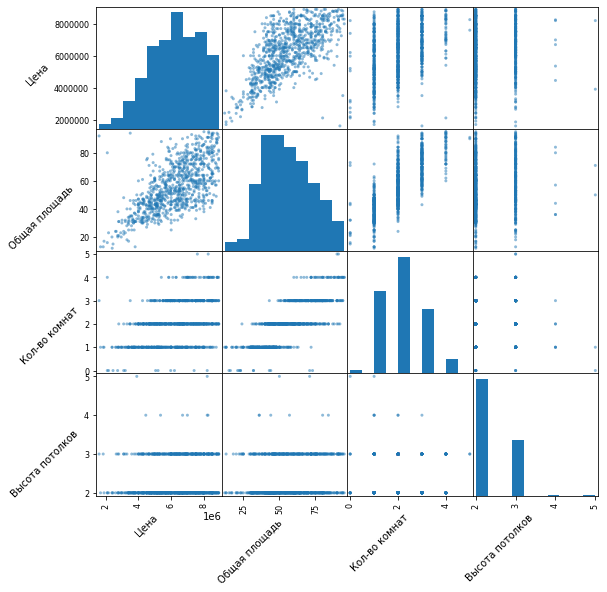

,Цена,Площадь кухни,Жилая площадь,Балкон,Число парков в радиусе 3 км,Число водоёмов в радиусе 3 км
Цена,1.000000,0.334738,0.512667,0.044228,0.098442,-0.097142
Площадь кухни,0.334738,1.000000,-0.007528,0.036151,0.043762,-0.032980
Жилая площадь,0.512667,-0.007528,1.000000,-0.225969,0.110576,-0.023985
Балкон,0.044228,0.036151,-0.225969,1.000000,-0.178037,-0.001941
Число парков в радиусе 3 км,0.098442,0.043762,0.110576,-0.178037,1.000000,0.074797
Число водоёмов в радиусе 3 км,-0.097142,-0.032980,-0.023985,-0.001941,0.074797,1.000000


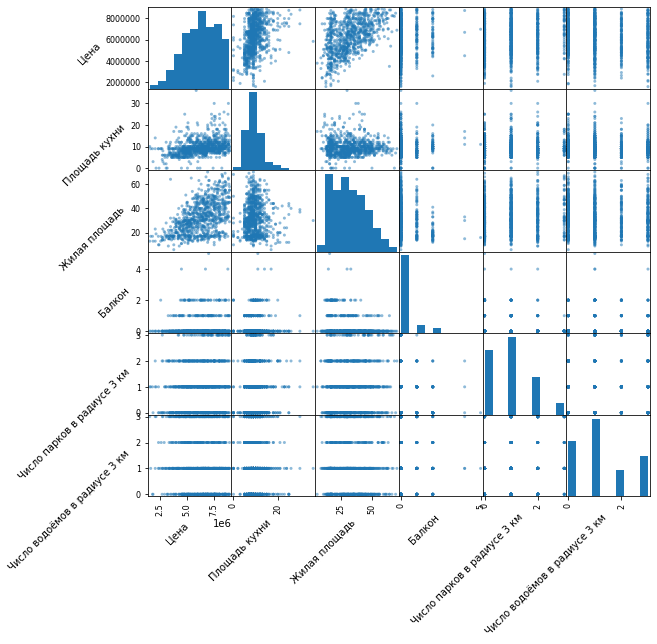

In [ ]:
for columns in diction:
    display(spb[columns].corr())
    ax=pd.plotting.scatter_matrix(spb[columns], figsize=(9, 9))
    for ax in ax.flatten():
        ax.xaxis.label.set_rotation(45)
        ax.xaxis.label.set_ha('right')
        ax.yaxis.label.set_rotation(45)
        ax.yaxis.label.set_ha('right')
    plt.show()

In [ ]:
spb[columns1].describe()

,Цена,Общая площадь,Кол-во комнат,Высота потолков
count,8.720000e+02,872.000000,872.000000,872.000000
mean,6.236079e+06,55.845183,2.016055,2.339450
std,1.544076e+06,17.273384,0.893769,0.502031
min,1.600000e+06,12.000000,0.000000,2.000000
25%,5.100000e+06,43.000000,1.000000,2.000000
50%,6.400000e+06,54.000000,2.000000,2.000000
75%,7.500000e+06,69.000000,3.000000,3.000000
max,8.900000e+06,95.000000,5.000000,5.000000


In [ ]:
df[['last_price','total_area','rooms','ceiling_height']].describe()

,last_price,total_area,rooms,ceiling_height
count,1.612100e+04,16121.000000,16121.000000,16121.000000
mean,4.426349e+06,49.522548,1.830842,2.084238
std,1.733277e+06,15.036750,0.850256,0.790515
min,4.300000e+05,12.000000,0.000000,1.000000
25%,3.200000e+06,38.000000,1.000000,2.000000
50%,4.200000e+06,46.000000,2.000000,2.000000
75%,5.500000e+06,60.000000,2.000000,2.000000
max,8.900000e+06,95.000000,6.000000,32.000000


1. Средняя цена в Санкт-петербурге выше, чем во всем датасете, почти на 2 миллиона. Общая площадь квартир в среднем так же выше на 5 кв метров. Также из таблиц видно, что самая дорогая квартира находится в Питере и стоит почти 9 миллионов. И самая маленькая, и самая большая квартиры находятся в Питере.

In [ ]:
spb[columns1].corr()

,Цена,Общая площадь,Кол-во комнат,Высота потолков
Цена,1.000000,0.653640,0.405409,0.117446
Общая площадь,0.653640,1.000000,0.773353,0.151173
Кол-во комнат,0.405409,0.773353,1.000000,0.095307
Высота потолков,0.117446,0.151173,0.095307,1.000000


In [ ]:
df[['last_price','total_area','rooms','ceiling_height']].corr()

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.612770,0.385630,0.056747
total_area,0.612770,1.000000,0.808106,0.048829
rooms,0.385630,0.808106,1.000000,0.022217
ceiling_height,0.056747,0.048829,0.022217,1.000000


Зависимость между представленными факторами не слишком сильно отличается в Спб, чем от всех мест. Выше корреляция высоты потолков с другими факторами, но сама по себе она все равно слабая

In [ ]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,year_exposition,living_area_to_total_area,kitchen_area_to_total_area
count,16121.000000,1.612100e+04,16121.000000,16121.000000,16121.000000,16121.000000,16121.000000,16121.000000,16121.00000,16121.000000,...,11827.000000,16121.000000,16121.000000,16121.000000,16121.000000,13814.000000,16121.000000,16121.000000,16121.000000,16121.000000
mean,9.723280,4.426349e+06,49.522548,1.830842,2.084238,10.805409,28.259041,5.898642,8.82805,0.596923,...,15464.294411,0.385212,2616.441288,0.482724,2497.478878,81.521572,91051.091407,2017.638050,0.562630,0.188259
std,5.511642,1.733277e+06,15.036750,0.850256,0.790515,6.579635,11.319476,4.867974,3.28848,0.921712,...,8304.101142,0.674686,1383.363255,0.781908,1408.170991,63.366445,28672.492179,0.849501,0.110217,0.074722
min,0.000000,4.300000e+05,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.00000,0.000000,...,208.000000,0.000000,1.000000,0.000000,16.000000,1.000000,7962.962963,2014.000000,0.038462,0.000000
25%,6.000000,3.200000e+06,38.000000,1.000000,2.000000,5.000000,18.000000,2.000000,7.00000,0.000000,...,11220.000000,0.000000,692.000000,0.000000,743.000000,32.000000,74285.714286,2017.000000,0.486486,0.134328
50%,9.000000,4.200000e+06,46.000000,2.000000,2.000000,9.000000,28.000000,4.000000,8.00000,0.000000,...,13966.000000,0.000000,3500.000000,0.000000,3500.000000,60.000000,92500.000000,2018.000000,0.565217,0.173913
75%,14.000000,5.500000e+06,60.000000,2.000000,2.000000,16.000000,36.000000,8.000000,10.00000,1.000000,...,16817.500000,1.000000,3500.000000,1.000000,3500.000000,120.000000,108285.714286,2018.000000,0.636364,0.235294
max,39.000000,8.900000e+06,95.000000,6.000000,32.000000,60.000000,91.000000,31.000000,50.00000,5.000000,...,65952.000000,3.000000,3500.000000,3.000000,3500.000000,250.000000,312240.000000,2019.000000,1.500000,0.787879


# Выводы

Итого, были заполнены все пропуски на основе имеющихся у нас данных. Во многом пропуски были обоснованы либо незнанием клиента, либо техническими неточностями. В основном пустые значения были в строках с объявлениями квартир в селах. Где, возможно, не стали указывать расстояние до центральных парков и прудов. Также были исправлены типы данных на правильные. 

Были вычислены следующие значения для всех строк: цена квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры, соотношение жилой и общей площади, а также отношение площади кухни к общей. Стало известно, что в среднем жилая плоащь занимает немного больше половины квартиры, в то время ка кухня занимает лишь пятую часть. Средняя цена на квадратный метр - 91 тысяча рублей.

С помощью построения графиков стало известно, что средняя стоимость квартиры составляет 4,5 млн рублей. Средняя площадь квартир составляет 60 квадратных метров, с 3мя комнатами и высотой потолков в 2.5 метра. В среднем объявление были опубликовано на сайте 95 дней. Самое долгое объявление простояло на сайте 1580 дней. И самое короткое всего 1 день. Также были удалены выбросы, которые обнаруживались с помощью коробочных диаграмм. 

Корелляцию присутствует у взаимосвязей между ценой и площадью квартиры и равняется 0.65. Также заметная корелляцию у взаимосвязей между ценой и удаленностью от центра квартиры, от количества комнат и этажа на каком расположена квартира. 

Определено из графика что центром Питера является территория радиусом 6-7 км от нулевого километра. В целом в Санкт-Петербурге квартиры дороже и больше по площади.